In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [3]:
df = pd.read_csv('datasets\medical-charges.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\hrida\AppData\Local\Temp\ipykernel_23056\387943773.py:1: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv('datasets\medical-charges.csv')


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


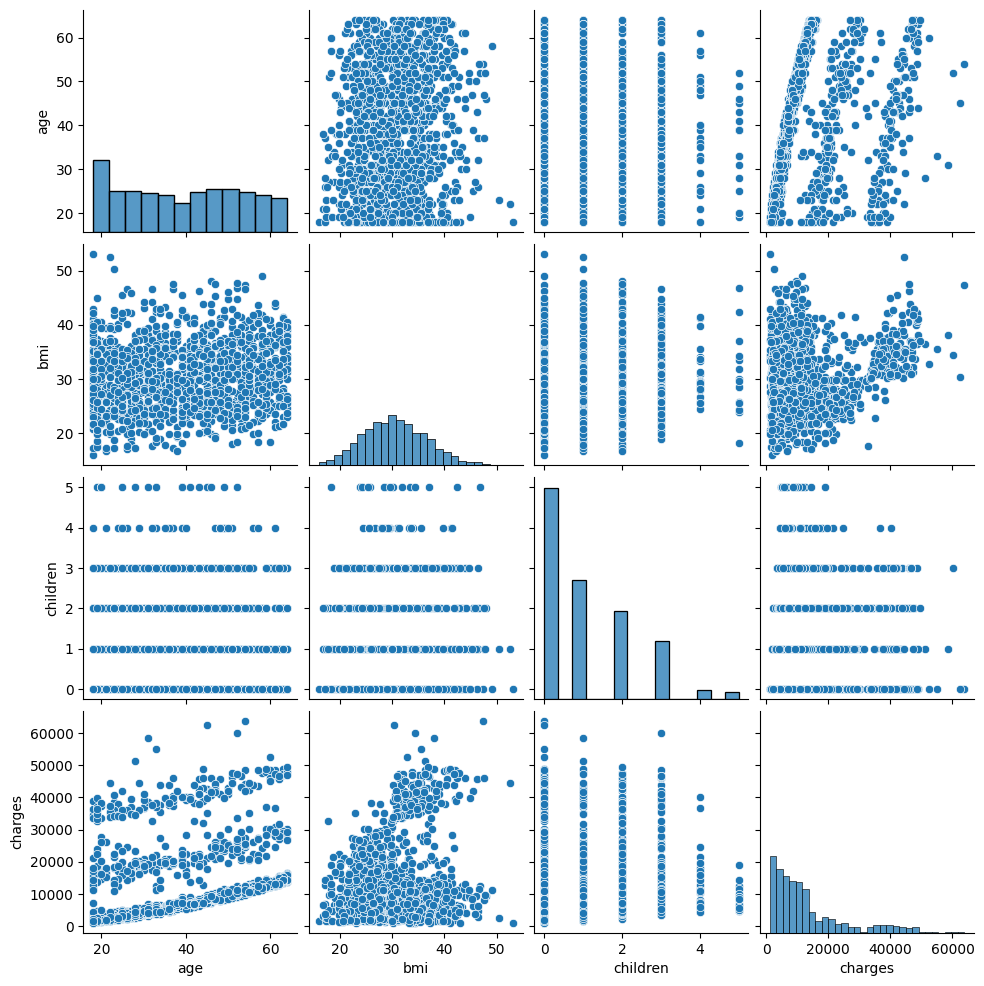

In [6]:
sns.pairplot(df)
plt.show()

In [7]:
fig = px.histogram(df, x='age', marginal='box', nbins=47, title="distribution of age")
fig.update_layout( bargap=0.1)
fig.show()

In [8]:
fig = px.histogram(df, x='bmi', marginal='box', nbins=47, title="distribution of bmi", color_discrete_sequence=['red'])
fig.update_layout( bargap=0.1)
fig.show()

In [9]:
fig = px.histogram(df, x='charges', marginal='box', nbins=47, title="distribution of charges", color='smoker')
fig.update_layout( bargap=0.1)
fig.show()

In [10]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [11]:
px.histogram(df, x='smoker', color='sex', barmode='group', title='sex vs smoker')

In [12]:
fig = px.scatter(df, x='age', y='charges', title="dage vs charges", opacity=0.8,hover_data=['sex'], color='smoker')
fig.update_traces( marker_size=5)
fig.show()

In [13]:
fig = px.scatter(df, x='bmi', y='charges', title="dage vs charges", opacity=0.8,hover_data=['sex'], color='smoker')
fig.update_traces( marker_size=5)
fig.show()

In [14]:
px.violin(x=df['children'],y=df['charges'])

In [15]:
smoker_value = {'yes':1,'no':0}
smoker_num = df.smoker.map(smoker_value)
smoker_num.head(), df.smoker.head()

(0    1
 1    0
 2    0
 3    0
 4    0
 Name: smoker, dtype: int64,
 0    yes
 1     no
 2     no
 3     no
 4     no
 Name: smoker, dtype: object)

In [16]:
df.charges.corr(smoker_num)

0.7872514304984782

In [17]:
df.charges.corr(df.children)

0.06799822684790469

In [18]:
df.charges.corr(df.age)

0.2990081933306476

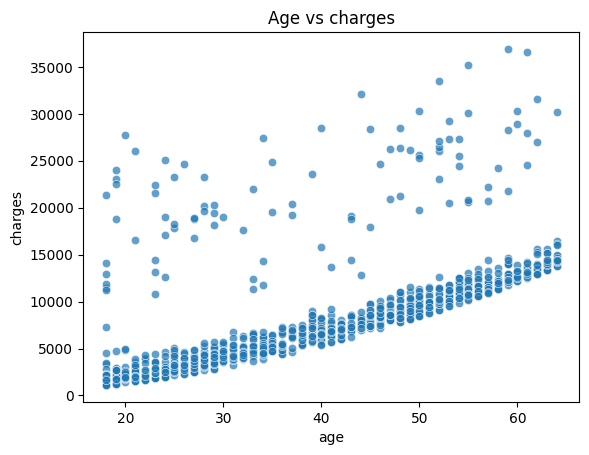

In [19]:
non_smoker = df[df['smoker'] == 'no']
sns.scatterplot(x='age',y='charges',data=non_smoker, alpha = 0.7)
plt.title('Age vs charges')
plt.show()

In [20]:
def estimate_charges(age, w,b):
    return w * age + b

estimate_charges(30, 60,100)

1900

In [21]:
w = 60
b = 100

age_ns = non_smoker['age']

In [22]:
age_ns

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [23]:
predicted_charges = []
for age in age_ns:
    predicted_charge = estimate_charges(age, w, b)
    predicted_charges.append(predicted_charge)


non_smoker['predicted_charges'] = predicted_charges

C:\Users\hrida\AppData\Local\Temp\ipykernel_23056\3129396121.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
non_smoker.head()

,age,sex,bmi,children,smoker,region,charges,predicted_charges
1,18,male,33.770,1,no,southeast,1725.55230,1180
2,28,male,33.000,3,no,southeast,4449.46200,1780
3,33,male,22.705,0,no,northwest,21984.47061,2080
4,32,male,28.880,0,no,northwest,3866.85520,2020
5,31,female,25.740,0,no,southeast,3756.62160,1960


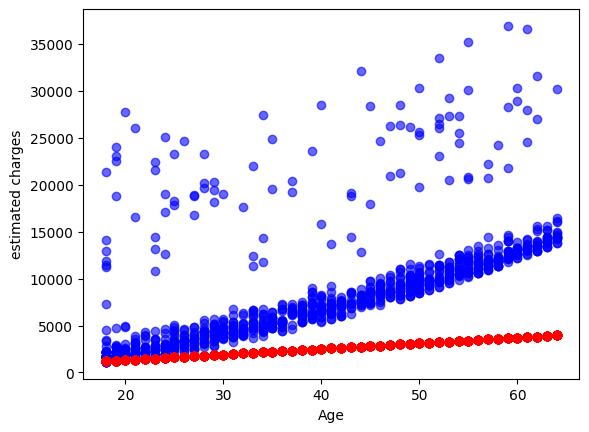

In [25]:
plt.scatter(non_smoker['age'], non_smoker['charges'], color='blue', alpha=0.6, label='Actual Charges')
plt.plot(non_smoker['age'], non_smoker['predicted_charges'], 'r-o')
plt.xlabel('Age')
plt.ylabel('estimated charges')
plt.show()

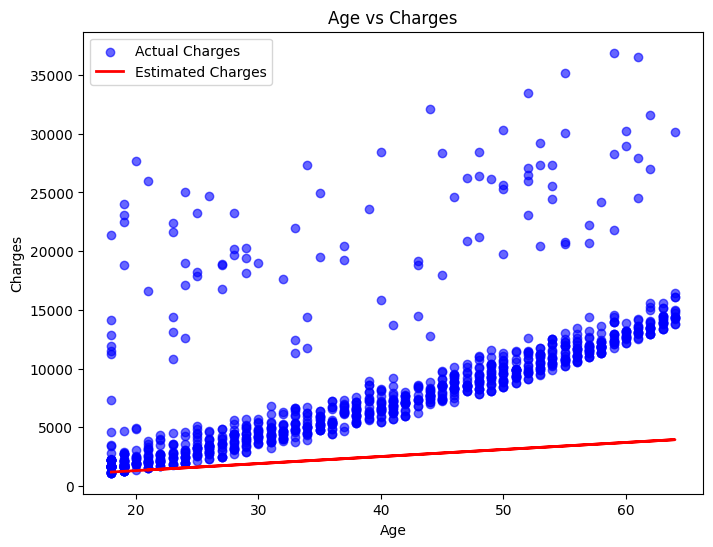

In [26]:
target = non_smoker.charges

plt.figure(figsize=(8, 6))
plt.scatter(non_smoker['age'], non_smoker['charges'], color='blue', alpha=0.6, label='Actual Charges')
plt.plot(age_ns, non_smoker['predicted_charges'], color='red', linewidth=2, label='Estimated Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.legend()
plt.show()


In [27]:
non_smoker.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [28]:
non_smoker.age

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [29]:
def try_parameters(w, b):
    ages = non_smoker.age
    target = non_smoker['charges']
    
    estimated_charges = ages * w + b
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

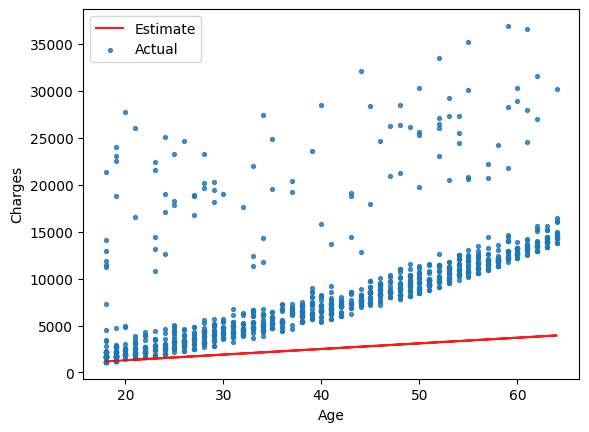

In [30]:
try_parameters(60,100)

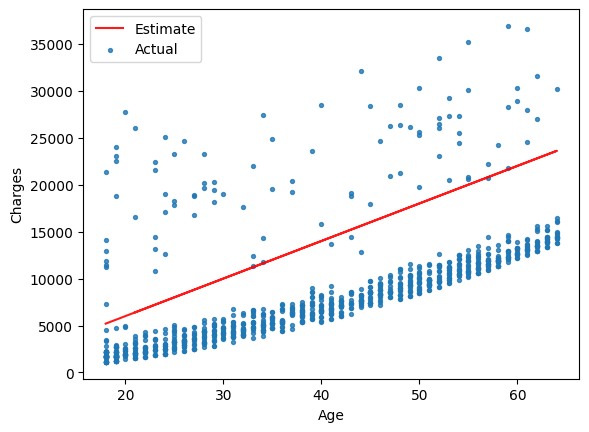

In [31]:
try_parameters(400,-2000)

In [32]:
def rmse(target, predicted):
    return np.sqrt(np.mean(np.square(target - predicted)))

# Function for getting errors

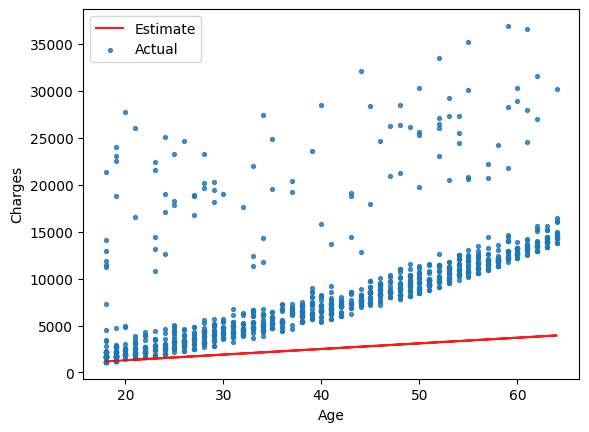

In [33]:
w = 60
b = 100
try_parameters(w, b)

In [34]:
target = non_smoker['charges']
predicted = estimate_charges(30, w,b)

In [35]:
rmse(target, predicted)

8865.005256148066

In [36]:
def try_parameters_x(w, b):
    ages = non_smoker.age
    target = non_smoker['charges']
    
    predictions = estimate_charges(ages, w,b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])
    plt.show()
    loss = rmse(target, predictions)
    print('Loss:', loss)

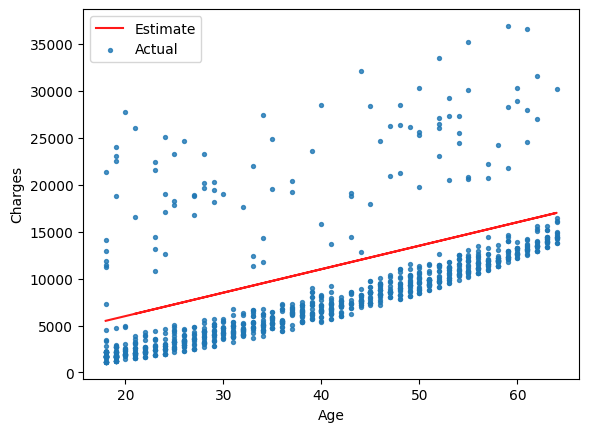

Loss: 5255.090881695294


In [37]:
try_parameters_x(250,1000)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [39]:
lr = LinearRegression()
oh = OneHotEncoder()

In [40]:
input = non_smoker[['age']]
target = non_smoker['charges']
print('input shape:' , input.shape)
print('target shape:' , target.shape)

input shape: (1064, 1)
target shape: (1064,)


In [41]:
lr.fit(input, target)

LinearRegression()

In [42]:
lr.score(input, target)

0.3943171632425906

In [43]:
lr.predict(np.array([[30],
            [40],
            [50]]))

C:\Users\hrida\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 5926.04682837,  8598.53595668, 11271.02508499])

In [44]:
predictions = lr.predict(input)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [45]:
rmse(target, predictions)

4662.505766636395

In [46]:
lr.coef_, lr.intercept_

(array([267.24891283]), -2091.4205565650864)

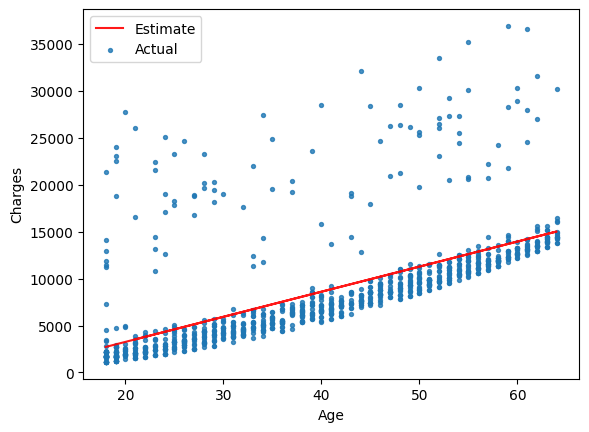

Loss: 4662.505766636395


In [47]:
try_parameters_x(lr.coef_, lr.intercept_)

In [48]:
#Create inputs and target
inputs, target = non_smoker[['age']], non_smoker['charges']

#Create and train the model
model = LinearRegression().fit(inputs, target)

# Make predictions
preddictions = model.predict(inputs)

#compute the loss to evaluate model
loss = rmse(target, predictions)
print('loss:', loss)

loss: 4662.505766636395


In [49]:
model.coef_, model.intercept_

(array([267.24891283]), -2091.4205565650864)

In [50]:
non_smoker.charges.corr(non_smoker.children)

0.13892870453542183

In [51]:
fig = px.strip(non_smoker, x="children", y="charges", title='children vs charges')
fig.update_traces(marker={'size': 4, 'opacity': 0.7})
fig.show()

In [52]:
input, target = non_smoker[['age', 'children','bmi']], non_smoker['charges']

model = LinearRegression().fit(input, target)

predictions = model.predict(input)

loss = rmse(target, predictions)
print('loss:', loss)

loss: 4608.470405038247


In [53]:
# Comparing with original dataset 

input, target = df[['age', 'children','bmi']], df['charges']

model = LinearRegression().fit(input, target)

predictions = model.predict(input)

loss = rmse(target, predictions)
print('loss:', loss)

loss: 11355.317901125973


In [54]:
px.scatter(df, x='age', y='charges', color='smoker', title='age vs charges')

In [55]:
non_smoker.head()

,age,sex,bmi,children,smoker,region,charges,predicted_charges
1,18,male,33.770,1,no,southeast,1725.55230,1180
2,28,male,33.000,3,no,southeast,4449.46200,1780
3,33,male,22.705,0,no,northwest,21984.47061,2080
4,32,male,28.880,0,no,northwest,3866.85520,2020
5,31,female,25.740,0,no,southeast,3756.62160,1960


In [56]:
gender = {'male':1, 'female':0}
df['gender']= df['sex'].map(gender)

smoker_code = {'yes':1, 'no':0}
df['smoker_code']= df['smoker'].map(smoker_code)

In [57]:
df.head()

,age,sex,bmi,children,smoker,region,charges,gender,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [58]:
input, target = df[['age', 'bmi', 'children', 'gender', 'smoker_code']], df['charges']

model = LinearRegression().fit(input, target)

predictions = model.predict(input)

loss = rmse(target, predictions)
print('loss:', loss)

loss: 6056.100708754546


In [62]:
px.bar(df, x='region', y='charges', barmode='group', title='region vs charges')

In [63]:
oh.fit(df[['region']])
oh.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [66]:
one_hot = oh.transform(df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [69]:
df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
df.head(10)

,age,sex,bmi,children,smoker,region,charges,gender,smoker_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0.0,1.0,0.0,0.0
5,31,female,25.740,0,no,southeast,3756.62160,0,0,0.0,0.0,1.0,0.0
6,46,female,33.440,1,no,southeast,8240.58960,0,0,0.0,0.0,1.0,0.0
7,37,female,27.740,3,no,northwest,7281.50560,0,0,0.0,1.0,0.0,0.0
8,37,male,29.830,2,no,northeast,6406.41070,1,0,1.0,0.0,0.0,0.0
9,60,female,25.840,0,no,northwest,28923.13692,0,0,0.0,1.0,0.0,0.0


In [70]:
input_cols = ['age', 'bmi', 'children', 'gender', 'smoker_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, target = df[input_cols], df['charges']

model = LinearRegression().fit(inputs, target)

predictions = model.predict(inputs)

loss = rmse(target, predictions)
print('loss:', loss)

loss: 6041.679651174452


In [71]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515,  -131.3143594 ,
       23848.53454191,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [72]:
model.intercept_

-12525.547811195454

In [77]:
weights_data = pd.DataFrame({'feature':np.append(input_cols,1),
                             'weight':np.append(model.coef_,model.intercept_)
})

weights_data

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,gender,-131.314359
4,smoker_code,23848.534542
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [75]:
model.predict([[28,30,2,1,0,0,1,0,0]])

C:\Users\hrida\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([5895.96573468])

In [78]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(df[numeric_cols])

StandardScaler()

In [79]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [80]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [82]:
scaled_inputs = scaler.transform(df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [84]:
cat_cols = ['smoker_code', 'gender', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = df[cat_cols].values

In [86]:
inputs = np.concatenate((scaled_inputs,categorical_data),axis=1)
targets = df.charges

model = LinearRegression().fit(inputs,targets)
preddictions = model.predict(inputs)

loss= rmse(targets,preddictions)
print('Loss:',loss)

Loss: 6041.679651174452


In [87]:
model.coef_

array([ 3607.47273619,  2067.69196584,   572.99820995, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [88]:
model.intercept_

8466.48321541183